In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("C:/Users/deevy/Desktop/reviews/La_Veranda_Reviews-2023-01-16.csv")
df.head()

,Title,PositiveReview,NegativeReview,Score,GuestName,GuestCountry,RoomType,NumberOfNights,VisitDate,GroupType,PropertyResponse
0,Wonderful place to stay.,"New, comfortable apartments, close to the airp...",Nothing at all.,10.0,Olga,Norway,Budget Twin Room,1 night,June 2022,Solo traveler,NaN
1,It was superb,We had a really pleasant stay! The staff was v...,NaN,10.0,Iwona,Poland,Double Room,3 nights,December 2022,Family,NaN
2,Very Good,the location is great and near the airport. bu...,NaN,8.0,Ruijia,Sweden,Double Room,1 night,December 2022,Solo traveler,NaN
3,Wonderful,Great stuff\nGreat Quality/price\nClean,NaN,9.0,Theprincem,United Kingdom,Double Room with Balcony,2 nights,September 2022,Solo traveler,NaN
4,"Fantastic value for a new, modern and spotless...","Clean and modern with very comfortable beds, i...",NaN,10.0,M,Switzerland,Family Suite with Balcony,1 night,October 2022,Family,NaN


# Transforming Data

In [2]:
df.columns,df.shape, df.dtypes

(Index(['Title', 'PositiveReview', 'NegativeReview', 'Score', 'GuestName',
        'GuestCountry', 'RoomType', 'NumberOfNights', 'VisitDate', 'GroupType',
        'PropertyResponse'],
       dtype='object'),
 (1523, 11),
 Title                object
 PositiveReview       object
 NegativeReview       object
 Score               float64
 GuestName            object
 GuestCountry         object
 RoomType             object
 NumberOfNights       object
 VisitDate            object
 GroupType            object
 PropertyResponse     object
 dtype: object)

In [3]:
df.isnull().sum()

Title                  2
PositiveReview       748
NegativeReview      1088
Score                  0
GuestName              0
GuestCountry           0
RoomType              63
NumberOfNights         0
VisitDate              0
GroupType              0
PropertyResponse    1400
dtype: int64

In [4]:
df['GroupType'].value_counts(),df['NumberOfNights'].value_counts(),df['Score'].value_counts(),df['RoomType'].value_counts(),df['GuestCountry'].value_counts()

(Couple           536
 Family           415
 Solo traveler    395
 Group            177
 Name: GroupType, dtype: int64,
 1 night      1151
 2 nights      142
 3 nights       92
 4 nights       57
 7 nights       35
 5 nights       15
 9 nights       10
 6 nights        5
 14 nights       4
 11 nights       3
 8 nights        3
 12 nights       2
 10 nights       2
 16 nights       1
 15 nights       1
 Name: NumberOfNights, dtype: int64,
 10.0    701
 9.0     361
 8.0     307
 7.0      89
 6.0      32
 5.0      13
 4.0       6
 1.0       5
 3.0       4
 9.6       2
 2.0       2
 7.9       1
 Name: Score, dtype: int64,
 Double Room with Balcony     702
 Double Room                  351
 Two-Bedroom Suite            125
 Standard Triple Room         107
 Budget Twin Room              80
 Family Suite with Balcony     69
 Suite with Balcony            26
 Name: RoomType, dtype: int64,
 United Kingdom        239
 Cyprus                183
 Israel                133
 France                 

In [5]:
df['NumberOfNights'] = df['NumberOfNights'].str.split(expand=True).iloc[:,0]
df['NumberOfNights'] = df['NumberOfNights'].astype('int64')

In [6]:
df['VisitDate'] = pd.to_datetime(df['VisitDate'])

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1523 entries, 0 to 1522
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Title             1521 non-null   object        
 1   PositiveReview    775 non-null    object        
 2   NegativeReview    435 non-null    object        
 3   Score             1523 non-null   float64       
 4   GuestName         1523 non-null   object        
 5   GuestCountry      1523 non-null   object        
 6   RoomType          1460 non-null   object        
 7   NumberOfNights    1523 non-null   int64         
 8   VisitDate         1523 non-null   datetime64[ns]
 9   GroupType         1523 non-null   object        
 10  PropertyResponse  123 non-null    object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(8)
memory usage: 131.0+ KB


<AxesSubplot:title={'center':'Unique features per Value'}>

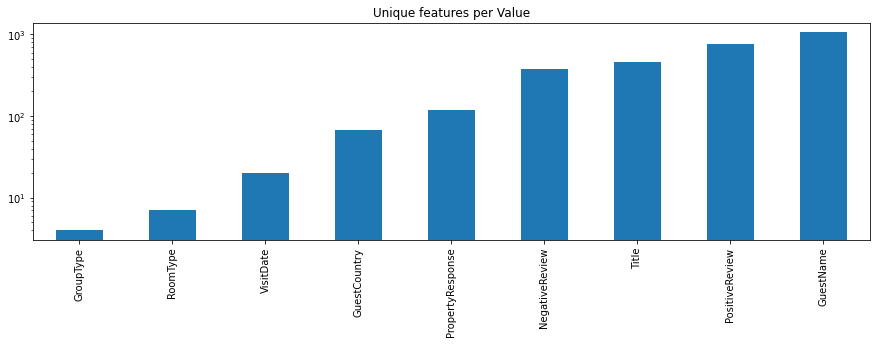

In [8]:
unique_values= df.select_dtypes(exclude="number").nunique().sort_values()
unique_values.plot.bar(logy=True, figsize=(15,4), title="Unique features per Value")

In [9]:
df.duplicated().sum(), df.isna().sum()

(0,
 Title                  2
 PositiveReview       748
 NegativeReview      1088
 Score                  0
 GuestName              0
 GuestCountry           0
 RoomType              63
 NumberOfNights         0
 VisitDate              0
 GroupType              0
 PropertyResponse    1400
 dtype: int64)

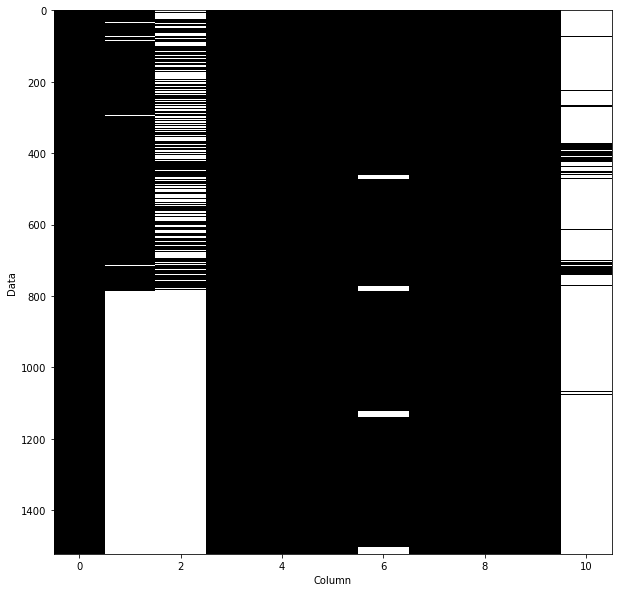

In [10]:
plt.figure(figsize=(10, 10))
plt.imshow(df.isna(), aspect="auto", interpolation="nearest", cmap="gray")
plt.xlabel("Column")
plt.ylabel("Data");

# Text Cleaning

In [11]:
import re
import string

sentence =  'booked two nights at the hotel'

def text_cleaner(text): # Remove square brackets, punctuation and numbers
    if not isinstance(text, float):
        text = text.lower()
        text = text.replace('\n', ' ')
        text = re.sub('\[.*?\]','',text) 
        text = re.sub('[%s]' % re.escape(string.punctuation),'',text)
        text = re.sub('\w*\d\w*','',text)
        text = re.sub('[‘’“”…]','',text)
    else:
        text = sentence
    return text

cleaner = lambda x: text_cleaner(x)

In [12]:
df['cleaned_Title'] = pd.DataFrame(df['Title'].apply(cleaner))
df.head(5)

,Title,PositiveReview,NegativeReview,Score,GuestName,GuestCountry,RoomType,NumberOfNights,VisitDate,GroupType,PropertyResponse,cleaned_Title
0,Wonderful place to stay.,"New, comfortable apartments, close to the airp...",Nothing at all.,10.0,Olga,Norway,Budget Twin Room,1,2022-06-01,Solo traveler,NaN,wonderful place to stay
1,It was superb,We had a really pleasant stay! The staff was v...,NaN,10.0,Iwona,Poland,Double Room,3,2022-12-01,Family,NaN,it was superb
2,Very Good,the location is great and near the airport. bu...,NaN,8.0,Ruijia,Sweden,Double Room,1,2022-12-01,Solo traveler,NaN,very good
3,Wonderful,Great stuff\nGreat Quality/price\nClean,NaN,9.0,Theprincem,United Kingdom,Double Room with Balcony,2,2022-09-01,Solo traveler,NaN,wonderful
4,"Fantastic value for a new, modern and spotless...","Clean and modern with very comfortable beds, i...",NaN,10.0,M,Switzerland,Family Suite with Balcony,1,2022-10-01,Family,NaN,fantastic value for a new modern and spotless ...


# Sentiment Analysis of 'Title' Column

In [13]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [16]:
nltk.downloader.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\deevy\AppData\Roaming\nltk_data...


True

In [14]:
def analyze_sentiment(clean_text):
    score = SentimentIntensityAnalyzer().polarity_scores(clean_text)
    if score['pos'] > score['neg']: 
        return 1
    else: 
        return 0
    
analyzer = lambda x: analyze_sentiment(x)

In [17]:
df['sentiment_Title'] = pd.DataFrame(df['cleaned_Title'].apply(analyzer))
df.head(5)

,Title,PositiveReview,NegativeReview,Score,GuestName,GuestCountry,RoomType,NumberOfNights,VisitDate,GroupType,PropertyResponse,cleaned_Title,sentiment_Title
0,Wonderful place to stay.,"New, comfortable apartments, close to the airp...",Nothing at all.,10.0,Olga,Norway,Budget Twin Room,1,2022-06-01,Solo traveler,NaN,wonderful place to stay,1
1,It was superb,We had a really pleasant stay! The staff was v...,NaN,10.0,Iwona,Poland,Double Room,3,2022-12-01,Family,NaN,it was superb,1
2,Very Good,the location is great and near the airport. bu...,NaN,8.0,Ruijia,Sweden,Double Room,1,2022-12-01,Solo traveler,NaN,very good,1
3,Wonderful,Great stuff\nGreat Quality/price\nClean,NaN,9.0,Theprincem,United Kingdom,Double Room with Balcony,2,2022-09-01,Solo traveler,NaN,wonderful,1
4,"Fantastic value for a new, modern and spotless...","Clean and modern with very comfortable beds, i...",NaN,10.0,M,Switzerland,Family Suite with Balcony,1,2022-10-01,Family,NaN,fantastic value for a new modern and spotless ...,1


# Visualization

In [19]:
val_counts = df['sentiment_Title'].value_counts()
print(val_counts)

1    973
0    550
Name: sentiment_Title, dtype: int64


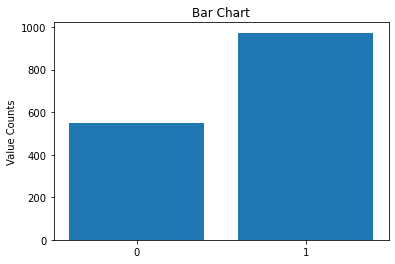

In [24]:
fig, ax = plt.subplots()
ax.bar(val_counts.index, val_counts.values)
ax.set_xticks([0, 1])
ax.set_xticklabels(['0', '1'])
ax.set_ylabel('Value Counts')
ax.set_title('Count of Negative and Positive Reviews')
plt.show()

In [25]:
top_10_countrys_score = df.groupby('GuestCountry')['Score'].agg(['count','mean']).sort_values(by='count',ascending=False).reset_index()[:10]
top_10_countrys_score

,GuestCountry,count,mean
0,United Kingdom,239,8.960669
1,Cyprus,183,8.792350
2,Israel,133,9.120301
3,France,97,9.047423
4,Germany,91,8.835165
5,Russia,75,9.212000
6,Ukraine,62,9.064516
7,Greece,53,9.056604
8,United States of America,44,9.000000
9,Italy,41,8.341463


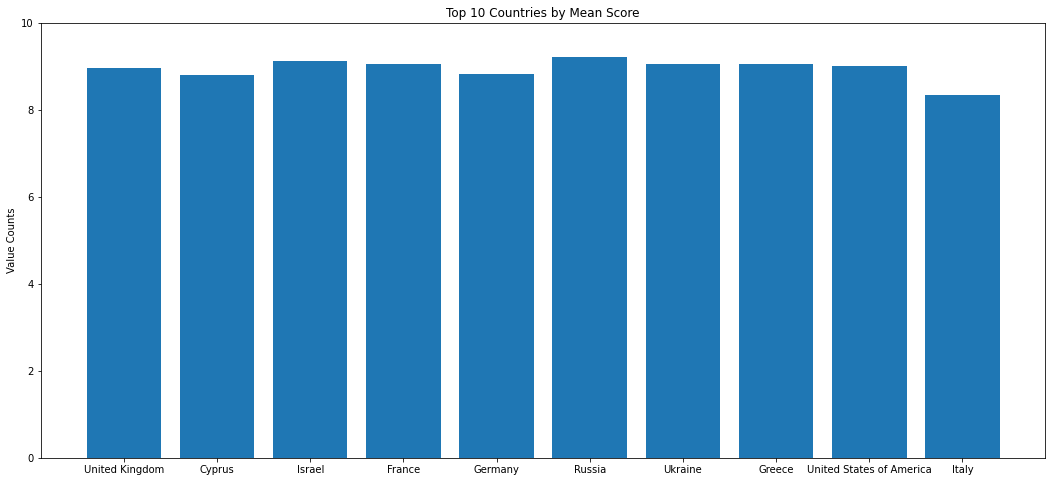

In [52]:
fig, ax = plt.subplots(figsize=(18,8))
ax.bar(top_10_countrys_score['GuestCountry'], top_10_countrys_score['mean'])
ax.set_ylim([0, 10])
ax.set_ylabel('Value Counts')
ax.set_title('Top 10 Countries by Mean Score')
plt.show()

In [44]:
top_10_countrys_night = df.groupby('GuestCountry')['NumberOfNights'].agg(['count','mean']).sort_values(by='count',ascending=False).reset_index()[:10]
top_10_countrys_night

,GuestCountry,count,mean
0,United Kingdom,239,1.748954
1,Cyprus,183,1.371585
2,Israel,133,1.383459
3,France,97,1.453608
4,Germany,91,1.714286
5,Russia,75,2.613333
6,Ukraine,62,2.048387
7,Greece,53,1.867925
8,United States of America,44,1.318182
9,Italy,41,1.390244


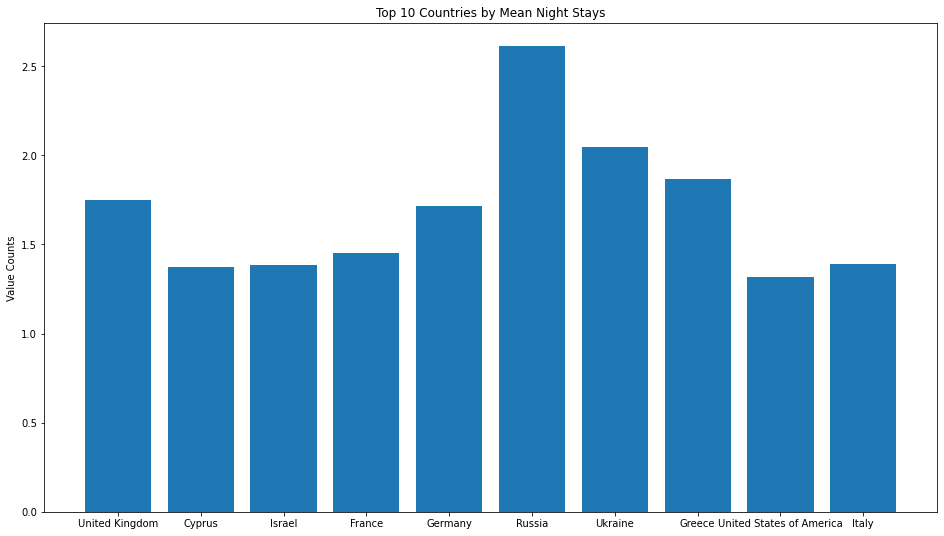

In [53]:
fig, ax = plt.subplots(figsize=(16,9))
ax.bar(top_10_countrys_night['GuestCountry'], top_10_countrys_night['mean'])    
ax.set_ylabel('Value Counts')
ax.set_title('Top 10 Countries by Mean Night Stays')
plt.show()